In [1]:
#Importing the basic libararies for performing operations and visualising the data.

In [2]:
import pandas as pd
import numpy as np
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
#Reading the pickle files where in we stored the data during data cleaning.

Out_Patient = pd.read_pickle("Train_OP_Cleaneddata.csv")
In_Patient = pd.read_pickle("Train_IN_Cleaneddata.csv")
Benificary_data = pd.read_pickle("Train_BE_Cleaneddata.csv")
Provider_data= pd.read_pickle("Train_PR_Cleaneddata.csv")

In [4]:
#Finding the number of common columns present in the In paitent and out paitent data file.
#For the calculation we have used intersection and then converted into a list form.

Common_Cols_IOP= In_Patient.columns.intersection(Out_Patient.columns).tolist()
len(Common_Cols_IOP)

27

In [5]:
#Combining the In patient and out patient into a single data frame as they both have same number of columns.

IP_OP_Df = pd.merge(left=In_Patient, right=Out_Patient, left_on=Common_Cols_IOP, right_on=Common_Cols_IOP, how="outer")
IP_OP_Df.shape

(558211, 30)

In [6]:
#Merging the In patient,Out paitent with the beneficiary data.

BEN_IP_OP_Df = pd.merge(left=IP_OP_Df, right=Benificary_data, left_on='BeneID', right_on='BeneID',how='inner')
BEN_IP_OP_Df.shape

(558211, 54)

In [7]:
#Joining the provider attribute with the benficiary,In patient,out patient data.

BEN_IP_OP_P_df = pd.merge(left=BEN_IP_OP_Df, right=Provider_data, left_on='Provider', right_on='Provider',how='inner')
BEN_IP_OP_P_df.shape

(558211, 55)

In [8]:
#Following are the EDA Questions and answers to them.

In [9]:
#Q1 What is Records counts for inpatient & outpatient data ?

In [10]:
print("Showing the Count of records in which a patients were admitted:{}.".format(In_Patient.shape[0]))

Showing the Count of records in which a patients were admitted:40474.


In [11]:
print("Showing the Count of records in which a patients were not admitted:{}.".format(Out_Patient.shape[0]))

Showing the Count of records in which a patients were not admitted:517737.


In [12]:
#Listing Patient IDs with or without admission who took medication.

In [13]:
#Finding the Beneficiary ID for both Inpatient and Outpatient data.

UNQ_IP_BENE=set(In_Patient['BeneID'])
UNQ_OP_BENE=set(Out_Patient['BeneID'])

In [14]:
#Calculating the length of Beneficiary ID for both Inpatient and Outpatient data.

LEN_BENEID_IP = len(UNQ_IP_BENE)
LEN_BENEID_OP = len(UNQ_OP_BENE)

In [15]:
#Displaying the length of Beneficiary ID for both Inpatient and Outpatient data.

print("The Number of distinct Inpatient IDs are,{}.".format(LEN_BENEID_IP))
print("The Number of distinct Outpatient IDs are,{}.".format(LEN_BENEID_OP))

The Number of distinct Inpatient IDs are,31289.
The Number of distinct Outpatient IDs are,133980.


In [16]:
#Retrieving the Beneficiary ID from Outpatient and Inpatient Records

In [17]:
#The common patients between the two datasets can be found via the intersection.
#Identifying patients who are exclusive to the outpatient dataset by using the difference.

IN_Patients_Only = UNQ_IP_BENE.intersection(UNQ_OP_BENE)
OP_Patients_Only = UNQ_OP_BENE.difference(UNQ_IP_BENE)

In [18]:
#Displaying the above calculated results.

print("Total number of inpatient patients only are,{}.".format(len(IN_Patients_Only)))
print("Total number of outpatient patients only are,{}.".format(len(OP_Patients_Only)))

Total number of inpatient patients only are,26713.
Total number of outpatient patients only are,107267.


In [19]:
#Making a DataFrame that summarizes the above values.
Counts_Of_Patients = pd.DataFrame({'Data of In-patients Only ': [len(IN_Patients_Only)],
                                   'Data of Out-patients Only ': [len(OP_Patients_Only)]})
Counts_Of_Patients

,Data of In-patients Only,Data of Out-patients Only
0,26713,107267


In [20]:
#Determining the total number of patients.

P_Total= len(IN_Patients_Only) + len(OP_Patients_Only)
print("Total No.of Patients are,{}.".format(P_Total))

Total No.of Patients are,133980.


In [21]:
P_Count = pd.DataFrame([len(IN_Patients_Only), len(OP_Patients_Only)]).T
P_Count.columns = ['Data of In-patients Only', 'Data of Out-patients Only']
P_Count

,Data of In-patients Only,Data of Out-patients Only
0,26713,107267


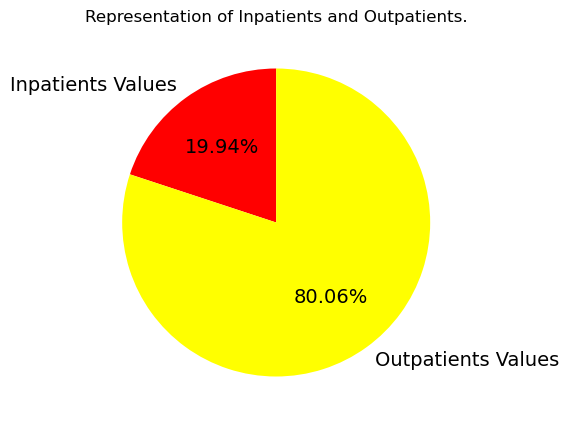

In [22]:
#Displaying  the attributes beside the portion of Pie Chart.
labels = ['Inpatients Values', 'Outpatients Values']

#Defining the values to be taken into consideration when drawing the pie chart.
sizes = [len(IN_Patients_Only), len(OP_Patients_Only)]

#Defining the size of the pie chart.
plt.figure(figsize=(5,5))

#Creating the pie chart with the neccessary attributes.
plt.pie(sizes, labels=labels, colors=['Red', 'yellow'], autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})

#Displaying the Title of Pie Chart.
plt.title("Representation of Inpatients and Outpatients.")

#Showing the Chart.
plt.show()

In [23]:
#OBSERVATION:From the above pie chart, we can conclude that 80% of the patients gets medical care without even admission.

In [24]:
#Q2.What is the Number of Fraud and Non Fraud Value counts ?

In [25]:
print("The distinct number of providers are:{}".format(Provider_data.shape[0]))

The distinct number of providers are:5410


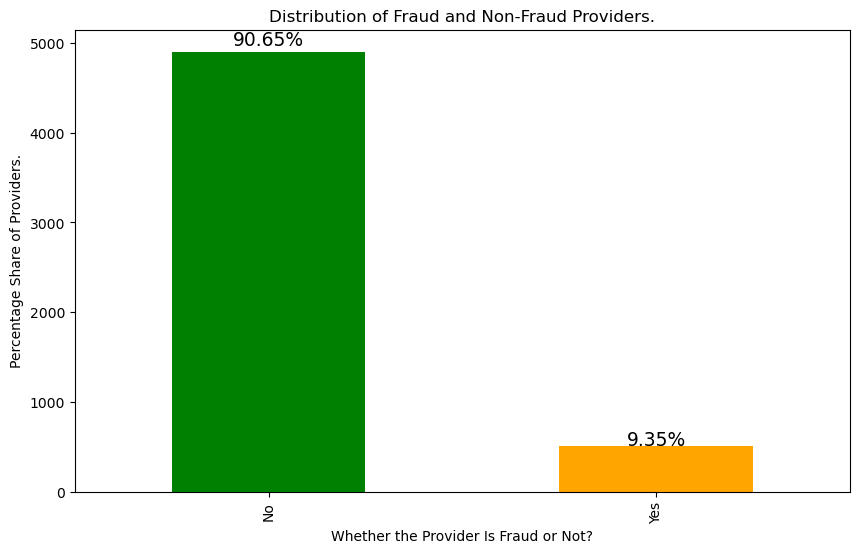

In [26]:
#Defining the size of the figure.
plt.figure(figsize=(10,6))

# Creating a bar plot and defining the necessary parameters
fig = Provider_data["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])

# Displaying the Title of Barplot.
plt.title('Distribution of Fraud and Non-Fraud Providers.')

# Displaying the title of X-axis of the bar plot.
plt.xlabel('Whether the Provider Is Fraud or Not?')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Percentage Share of Providers.')

#Calculating the percentage of fraud and Non Fraud Providers.
for p in fig.patches:
    
    #Getting the width of bar.
    width = p.get_width()
    
    #Getting the height of bar .
    height = p.get_height()
    
    #Calculating x,y coordinates of the bar.
    x, y = p.get_xy()
    
    #Calculating percentage based on the height of the current bar and the total count of providers.
    percentage = f'{round((height * 100) /len(Provider_data), 2)}%'
    
    #Displaying the text correctly at the horizontal position.
    fig.annotate(percentage, (x + width/2, y + height*1.015), ha='center', fontsize=13.5)

#Showing the plot.
plt.show()

In [27]:
#OBSERVATION
# Based on the figure above, we may conclude that just 9% of the providers are actually participating in fraud, 
# and 90% of the suppliers are not fraud providers.

In [28]:
#Updating IP and OP Dataset with the Admitted or Not Admitted values.

In [29]:
In_Patient["Admitted"] = 1

In [30]:
In_Patient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
Out_Patient["Admitted"] = 0

In [32]:
Out_Patient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0


In [33]:
#Finding the number of common columns present in the In paitent and out paitent data file.
#For the calculation we have used intersection and then converted into a list form.

Common_Cols_IOP= In_Patient.columns.intersection(Out_Patient.columns).tolist()
len(Common_Cols_IOP)

28

In [34]:
#Combining the In patient and out patient into a single data frame as they both have same number of columns.

IP_OP_Df = pd.merge(left=In_Patient, right=Out_Patient, left_on=Common_Cols_IOP, right_on=Common_Cols_IOP, how="outer")
IP_OP_Df.shape

(558211, 31)

In [35]:
IP_OP_Df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,1


In [36]:
#Merging the In patient,Out paitent with the beneficiary data.

BEN_IP_OP_Df = pd.merge(left=IP_OP_Df, right=Benificary_data, left_on='BeneID', right_on='BeneID',how='inner')
BEN_IP_OP_Df.shape

(558211, 55)

In [37]:
#Joining the provider attribute with the benficiary,In patient,out patient data.

BEN_IP_OP_P_df = pd.merge(left=BEN_IP_OP_Df, right=Provider_data, left_on='Provider', right_on='Provider',how='inner')
BEN_IP_OP_P_df.shape

(558211, 56)

In [38]:
#Finding the No.of Unique Providers
BEN_IP_OP_P_df["Provider"].nunique()

5410

In [39]:
#Finding the No.of Unique Claim numbers
BEN_IP_OP_P_df["ClaimID"].nunique()

558211

In [40]:
#ASSUMPTION:: It's possible that a single provider was involved in many claims.
#Does this mean that every claim that a potentially fraudulent provider files is a fraud?
#This cannot be true for every provider because we cannot conclude that all of a certain provider's claims are fraudulent 
#just because they have filed, say, 50 claims. 
#It's possible that a provider files one or two bogus claims out of every fifty claims. 

In [41]:
#As a result, assuming that each claim made by a possibly fraudulent source is false is a noteworthy assumption.

In [42]:
PRVS_CLAIMS_df = pd.DataFrame(BEN_IP_OP_P_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
PRVS_CLAIMS_TGT_LBLS_df = pd.merge(left=PRVS_CLAIMS_df, right=Provider_data, on='Provider', how='inner')
PRVS_CLAIMS_TGT_LBLS_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


In [43]:
#OBSERVATION
#PRV51005 has filed 1165 claims,as seen in the following table; all of these will be marked as fraudulent after the datasets
#are joined.

In [44]:
print(pd.DataFrame(BEN_IP_OP_P_df['PotentialFraud'].value_counts()), "\n")

     PotentialFraud
No           345415
Yes          212796 



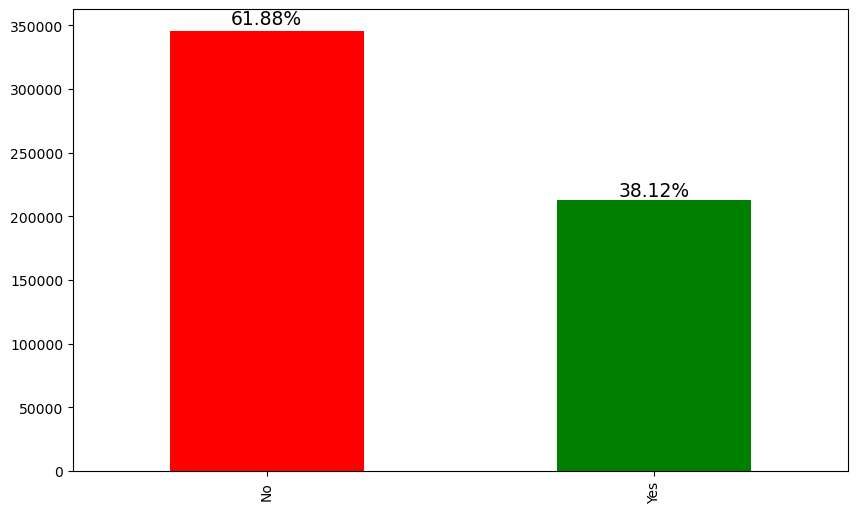

In [45]:
fig1 = BEN_IP_OP_P_df['PotentialFraud'].value_counts().plot(kind='bar', figsize=(10,6), color=['red', 'green'])

# Calculating the percentage of fraud and Non Fraud Providers.
for p in fig1.patches:
    # Getting the width of bar.
    width = p.get_width()
    
    # Getting the height of bar.
    height = p.get_height()
    
    # Calculating x, y coordinates of the bar.
    x, y = p.get_xy()
    
    # Calculating percentage based on the height of the current bar and the total count of providers.
    percentage = f'{round((height * 100) / len(BEN_IP_OP_P_df), 2)}%'
    
    # Displaying the text correctly at the horizontal position.
    fig1.annotate(percentage, (x + width/2, y + height*1.015), ha='center', fontsize=13.5)

# Displaying the plot.
plt.show()


In [46]:
#OBSERVATION
#According to the above plot, 32% of claims are fraudulent and 62% of claims are not.
#We may conclude that there is a class-imbalance issue based on the percentages, but the amount of records suggests that the 
#issue is not as serious.

In [47]:
#03 What are the most common procedures and diagnosis codes performed by the potential fradulent providers?

In [48]:
len(In_Patient)

40474

In [49]:
F_Train =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
F_Train = Provider_data.loc[(Provider_data['PotentialFraud'] == 'Yes')]
Fraud_Provider_Ip_df = pd.merge(In_Patient,F_Train, how='inner', on='Provider')
len(Fraud_Provider_Ip_df)

23402

In [50]:
(len(Fraud_Provider_Ip_df)/len(In_Patient)) * 100

57.81983495577408

In [51]:
#Observation.
# As a result, we may observe that 23402 admitted (inpatient) cases have had some interaction with possible fraudulent providers
# while receiving hospital treatments.This represents about 58% of the cases found in our inpatient database.
# This indicates that we can have fradulent behaviors on more than half of our inpatient dataset for training—58% of them have 
# the potential to be fradulent encounters.

In [52]:
len(Out_Patient)

517737

In [53]:
Fraud_Provider_Op_df= pd.merge(Out_Patient,F_Train, how='inner', on='Provider')
len(Fraud_Provider_Op_df)

189394

In [54]:
(len(Fraud_Provider_Op_df)/len(Out_Patient))*100

36.58112130290089

In [55]:
#Inference
#As a result, we can observe that 189394 outpatient cases are connected to the possible fraudulent providers at some time during 
#their hospital stay.This represents about 37% of the instances in our inpatient data.
#This indicates that we can have fraudulent activity on about 38% of interactions using our outpatient dataset for training.

    Procedure  count  Percentage
1      4019.0   1137    0.809760
2      2724.0    641    0.456514
3      9904.0    629    0.447967
4      8154.0    614    0.437285
5        66.0    535    0.381022
6      3893.0    483    0.343988
7      3995.0    474    0.337578
8      4516.0    365    0.259949
9      3722.0    332    0.236447
10     8151.0    280    0.199413


Text(0, 0.5, 'Percentage')

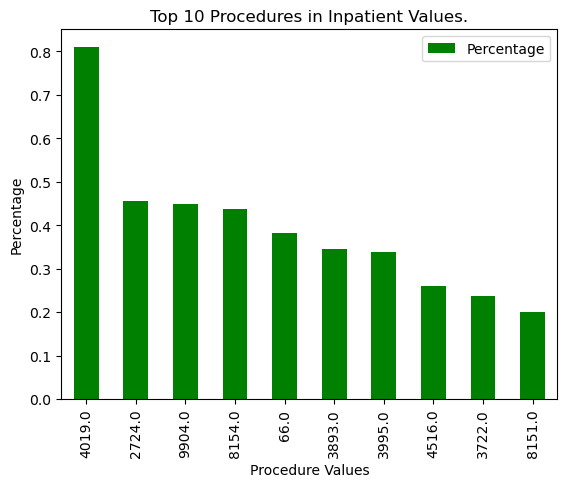

In [56]:
# Creating a series of all the Procedures.
Pro_Series = pd.concat([
    Fraud_Provider_Ip_df["ClmProcedureCode_1"],
    Fraud_Provider_Ip_df["ClmProcedureCode_2"],
    Fraud_Provider_Ip_df["ClmProcedureCode_3"],
    Fraud_Provider_Ip_df["ClmProcedureCode_4"],
    Fraud_Provider_Ip_df["ClmProcedureCode_5"],
    Fraud_Provider_Ip_df["ClmProcedureCode_6"]
], axis=0, ignore_index=True)

#Creating a data frame of all the procedures.
Procedures_df = pd.DataFrame({'Procedures': Pro_Series})

#Dropping the columns with the null values.
Procedures_df = Procedures_df.dropna()

#Calculating the value counts.
Pro_F_Group_df =Procedures_df['Procedures'].value_counts().reset_index(name='count')
Pro_F_Group_df.columns = ['Procedure', 'count']

#Adding a percentage column.
Pro_F_Group_df['Percentage'] = (Pro_F_Group_df['count'] / sum(Pro_F_Group_df['count'])) * 100

#Removing the procedures where the code is 0.0
Pro_F_Group_df = Pro_F_Group_df[Pro_F_Group_df['Procedure'] != 0.0]

#Changing the index that is making it from 1. 
Pro_F_Group_df.index = range(1, len(Pro_F_Group_df) + 1)

#Printing the top 10 rows.
print(Pro_F_Group_df.head(10))

# Plotting top 10 procedure values.
Plot_F_Pro_df =Pro_F_Group_df.head(10)

#Creating a plot and defining the necessary parameters.
Plot_F_Pro_df.plot(x='Procedure', y='Percentage', kind='bar', color='g')

# Displaying the Title of Barplot.
plt.title('Top 10 Procedures in Inpatient Values.')

# Displaying the title of X-axis of the bar plot.
plt.xlabel('Procedure Values')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Percentage')

   Diagnosis  count  Percentage
1       4019   8116    3.468080
2      25000   4248    1.815229
3       2724   4245    1.813948
4      41401   3744    1.599863
5       4280   3585    1.531920
6      42731   3510    1.499872
7       5990   3176    1.357149
8      53081   2794    1.193915
9       2449   2414    1.031536
10       496   2368    1.011879


Text(0, 0.5, 'Percentage Values')

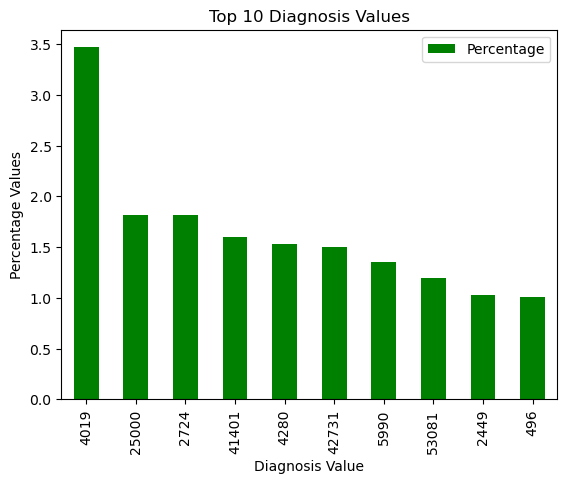

In [57]:
#Creating a series of all the Diagnosis.
Series_diag = pd.concat([
    Fraud_Provider_Ip_df["ClmDiagnosisCode_1"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_2"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_3"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_4"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_5"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_6"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_7"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_8"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_9"],
    Fraud_Provider_Ip_df["ClmDiagnosisCode_10"]
], axis=0, ignore_index=True)

#Creating a data frame of all the diagnosis columns.
Diag_df = pd.DataFrame({'Diagnosis':Series_diag})

#Dropping the columns with the null values.
Diag_df=Diag_df.dropna()

#Calculating the value counts.
Diag_F_Group_df =Diag_df['Diagnosis'].value_counts().reset_index(name='count')
Diag_F_Group_df.columns = ['Diagnosis', 'count']

#Adding a percentage column.
Diag_F_Group_df['Percentage'] = (Diag_F_Group_df['count'] / sum(Diag_F_Group_df['count'])) * 100

#Removing the procedures where the code is 0.0
Diag_F_Group_df = Diag_F_Group_df[Diag_F_Group_df['Diagnosis'] != 0]

#Changing the index that is making it from 1. 
Diag_F_Group_df.index = range(1, len(Diag_F_Group_df) + 1)

#Printing the top 10 rows.
print(Diag_F_Group_df.head(10))

# Plotting top 10 diagnosis values.
Plot_F_Diag_df =Diag_F_Group_df.head(10)

#Creating a plot and defining the necessary parameters.
Plot_F_Diag_df.plot(x='Diagnosis', y='Percentage', kind='bar', color='g')

# Displaying the Title of Barplot.
plt.title('Top 10 Diagnosis Values')

# Displaying the title of X-axis of the bar plot.
plt.xlabel('Diagnosis Value')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Percentage Values')

        count  Procedure  Percentage
9904.0      5     9904.0    5.555556
4516.0      5     4516.0    5.555556
66.0        4       66.0    4.444444
9390.0      3     9390.0    3.333333
5123.0      3     5123.0    3.333333
8703.0      3     8703.0    3.333333
3995.0      3     3995.0    3.333333
9952.0      3     9952.0    3.333333
4513.0      2     4513.0    2.222222
8152.0      2     8152.0    2.222222


Text(0, 0.5, 'Percentage Values')

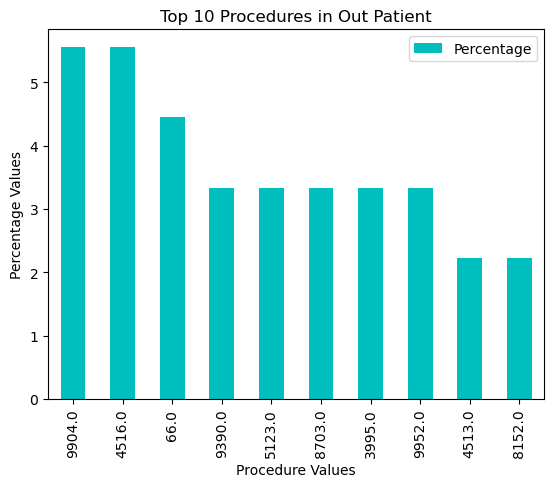

In [58]:
#Creating a series of all the Procedures.
Pro_Series_OP = pd.DataFrame(columns=['Procedures'])

#Creating a series of all the Procedures and dropping all the null values.
Pro_Series_OP['Procedures'] = pd.concat([
    Fraud_Provider_Op_df["ClmProcedureCode_1"],
    Fraud_Provider_Op_df["ClmProcedureCode_2"],
    Fraud_Provider_Op_df["ClmProcedureCode_3"],
    Fraud_Provider_Op_df["ClmProcedureCode_4"],
    Fraud_Provider_Op_df["ClmProcedureCode_5"],
    Fraud_Provider_Op_df["ClmProcedureCode_6"]
], axis=0, sort=True).dropna()

#Removing the procedures where the code is 0.0.
Pro_Series_OP=Pro_Series_OP[Pro_Series_OP['Procedures'] != 0.0]

#Calculating the value counts.
Grp_F_Pro_OP =Pro_Series_OP['Procedures'].value_counts()

#Converting it into frame.
Grp_F_Pro_OP = Grp_F_Pro_OP.to_frame()

#Creating a new column named as count.
Grp_F_Pro_OP.columns = ['count']

#Storing the index in new column procedure.
Grp_F_Pro_OP['Procedure'] = Grp_F_Pro_OP.index

#Calculating the precentage.
Grp_F_Pro_OP['Percentage'] = (Grp_F_Pro_OP['count'] / sum(Grp_F_Pro_OP['count'])) * 100

#Knowing the top 10 procedures.
Plot_Pro_OP = Grp_F_Pro_OP.head(10)
print(Grp_F_Pro_OP.head(10))

#Creating a plot to visualise and defining the neccessary parameters.
Plot_Pro_OP.plot(x='Procedure', y='Percentage', kind='bar', color='c')

# Displaying the Title of plot.
plt.title('Top 10 Procedures in Out Patient')

# Displaying the title of X-axis of the plot.
plt.xlabel('Procedure Values')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Percentage Values')

       count Diagnosis  Percentage
4019   22913      4019    4.630114
25000  10839     25000    2.190277
2724   10445      2724    2.110660
V5869   8809     V5869    1.780067
4011    8512      4011    1.720051
V5861   6974     V5861    1.409262
2720    5760      2720    1.163944
42731   5188     42731    1.048358
2449    4862      2449    0.982482
78079   3730     78079    0.753735


Text(0, 0.5, 'Percentage')

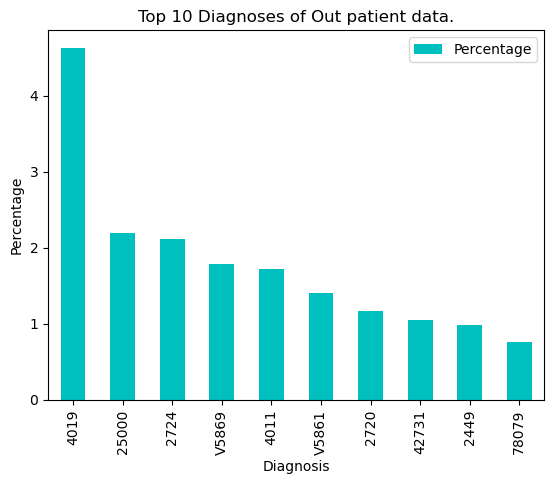

In [59]:
#Creating a Dataframe of all the diagnosis values.
Diag_df_OP=pd.DataFrame(columns=['Diagnosis'])

#Creating a series of all the Procedures and dropping all the null values.
Diag_df_OP['Diagnosis'] = pd.concat([
    Fraud_Provider_Op_df["ClmDiagnosisCode_1"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_2"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_3"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_4"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_5"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_6"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_7"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_8"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_9"],
    Fraud_Provider_Op_df["ClmDiagnosisCode_10"]
], axis=0, sort=True).dropna()

#Removing the procedures where the code is 0.0
Diag_df_OP = Diag_df_OP[Diag_df_OP['Diagnosis'] != 0]

#Calculating the value counts.
Group_Diag_df_OP = Diag_df_OP['Diagnosis'].value_counts()

#Converting it into frame.
Group_Diag_df_OP = Group_Diag_df_OP.to_frame()

#Creating a new column named as count.
Group_Diag_df_OP.columns = ['count']

#Storing the index in new column Diagnosis.
Group_Diag_df_OP['Diagnosis'] = Group_Diag_df_OP.index

#Calculating the precentage.
Group_Diag_df_OP['Percentage'] = (Group_Diag_df_OP['count'] / sum(Group_Diag_df_OP['count'])) * 100

#Knowing the top 10 diagnosis.
Plot_Group_Diag_df_OP = Group_Diag_df_OP.head(10)
print(Plot_Group_Diag_df_OP)

#Creating a plot to visualise and defining the neccessary parameters.
Plot_Group_Diag_df_OP.plot(x='Diagnosis', y='Percentage', kind='bar', color='c')

# Displaying the Title of plot.
plt.title('Top 10 Diagnoses of Out patient data.')

# Displaying the title of X-axis of the plot.
plt.xlabel('Diagnosis')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Percentage')

In [60]:
#04.What is State wise Percent Beneficiary Distribution?

Text(0, 0.5, '% Percentage of Beneficiaries')

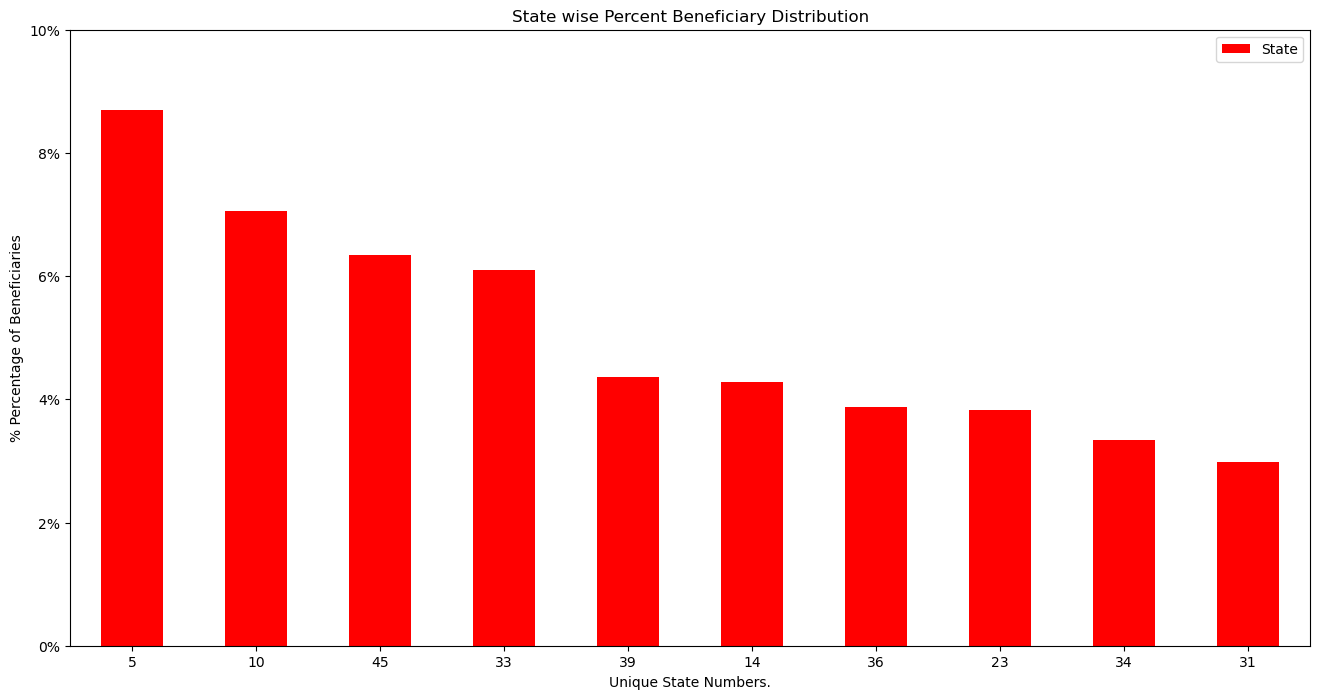

In [61]:
#Counting the frequency of each state.
State_count = pd.value_counts(Benificary_data['State'], sort=True)

# Select only the top 10 states
State_10 = State_count.head(10)

# Calculate the percentage distribution
Per_Distribution=State_10 * 100 / len(Benificary_data)

#Creating a plot to visualise and defining the neccessary parameters.
Per_Distribution.plot(kind='bar', rot=0, figsize=(16, 8),legend=True, color='Red')

#Creating the labels for the y axis.
plt.yticks(np.arange(0, 12, 2), ('0%', '2%', '4%', '6%', '8%', '10%'))

# Displaying the Title of plot.
plt.title("State wise Percent Beneficiary Distribution")

# Displaying the title of X-axis of the plot.
plt.xlabel("Unique State Numbers.")

# Displaying the title of Y-axis of the plot.
plt.ylabel("% Percentage of Beneficiaries")

Text(0, 0.5, 'Percentage of Beneficiaries.')

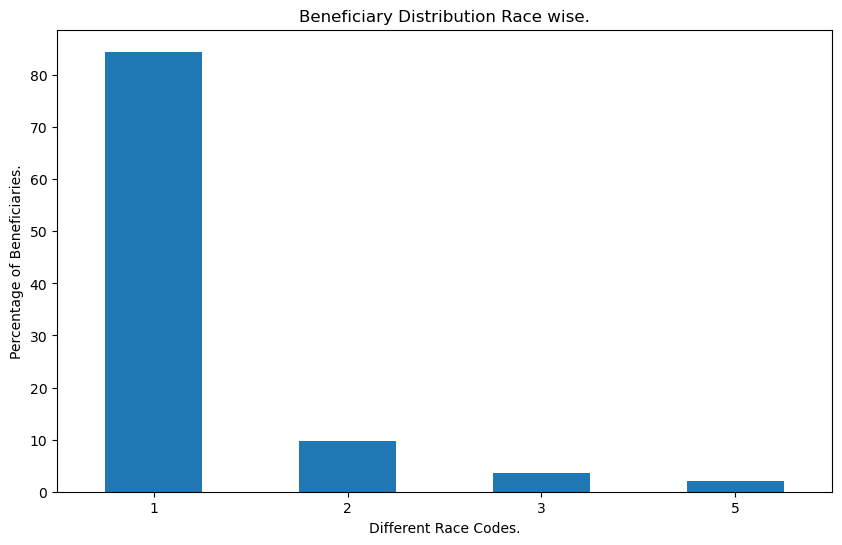

In [62]:
#Frequency Count of Races.
C_Race = pd.value_counts(Benificary_data['Race'], sort=True)

# Calculate the percentage distribution
Per_Race=C_Race * 100 / len(Benificary_data)

#Plotting the Bar plot.
Per_Race.plot(kind='bar',rot=0, figsize=(10, 6))

# Displaying the Title of plot.
plt.title("Beneficiary Distribution Race wise.")

#Displaying the title of X-axis of the plot.
plt.xlabel("Different Race Codes.")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Percentage of Beneficiaries.")


In [63]:
#Q5 How does the reimbursement amount vary among different age groups?

Text(0.5, 1.0, 'Insurance Claim Amount Reimbursement  Across Different Age Groups.')

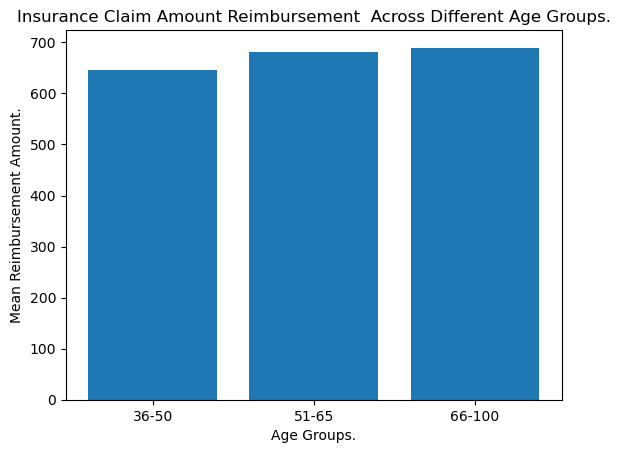

In [64]:
#Converting the date of birth into the required format.
BEN_IP_OP_P_df['DOB'] = pd.to_datetime(BEN_IP_OP_P_df['DOB'])

#Calculating age from today's date until the day it was born.
BEN_IP_OP_P_df['Age'] = (pd.to_datetime('today') - BEN_IP_OP_P_df['DOB']).astype('<m8[Y]')

#Defining the points of different age groups.
Bins = [0, 18, 35, 50, 65, 100]

#Splitting the age groups into different groups.
Labels = ['0-18', '19-35', '36-50', '51-65', '66-100']

#Creating a column named as age group and putting the respective age groups according to the ages.
BEN_IP_OP_P_df['AgeGroup'] = pd.cut(BEN_IP_OP_P_df['Age'], bins=Bins, labels=Labels, right=False)

#Calculating the mean of Insurance Claim Reimbursement Amount.
A_REI = BEN_IP_OP_P_df.groupby('AgeGroup')['InscClaimAmtReimbursed'].mean()

#Creating the bar and visualising the data.
plt.bar(A_REI.index, A_REI.values)

#Displaying the title of X-axis of the plot.
plt.xlabel('Age Groups.')

#Displaying the title of Y-axis of the plot.
plt.ylabel('Mean Reimbursement Amount.')

#Displaying the title of the plot.
plt.title('Insurance Claim Amount Reimbursement  Across Different Age Groups.')

In [65]:
#Q6.What is the distribution of reimbursement amounts for outpatient and inpatient claims?

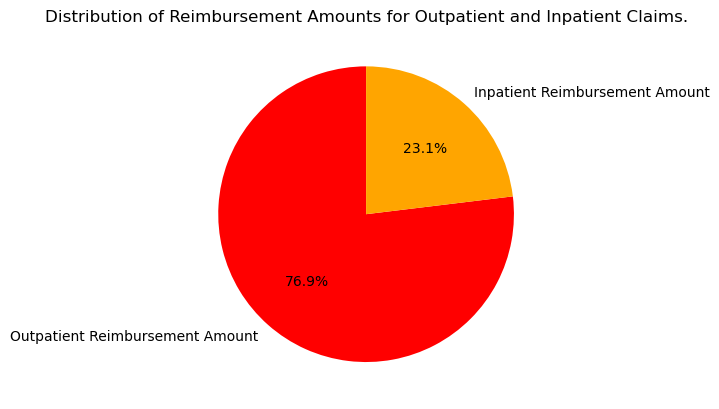

In [66]:
#Calculating the total reimbursement amount for each type.
Total_Outpatient_Reimbursement =BEN_IP_OP_P_df['OPAnnualReimbursementAmt'].sum()
Total_Inpatient_Reimbursement =BEN_IP_OP_P_df['IPAnnualReimbursementAmt'].sum()

#Defining the attributes we will need for creating a pie chart.
Labels_Pie_Chart = ['Outpatient Reimbursement Amount', 'Inpatient Reimbursement Amount']

#Creating a Pie Chart.
plt.pie([Total_Outpatient_Reimbursement,Total_Inpatient_Reimbursement],labels=Labels_Pie_Chart, 
        colors=['red', 'orange'], autopct='%1.1f%%', startangle=90)

#Defining the title of the pie chart.
plt.title('Distribution of Reimbursement Amounts for Outpatient and Inpatient Claims.')

#Displaying the chart.
plt.show()


In [67]:
#Q7.What is the 5 most chronic disseases that have fraud?

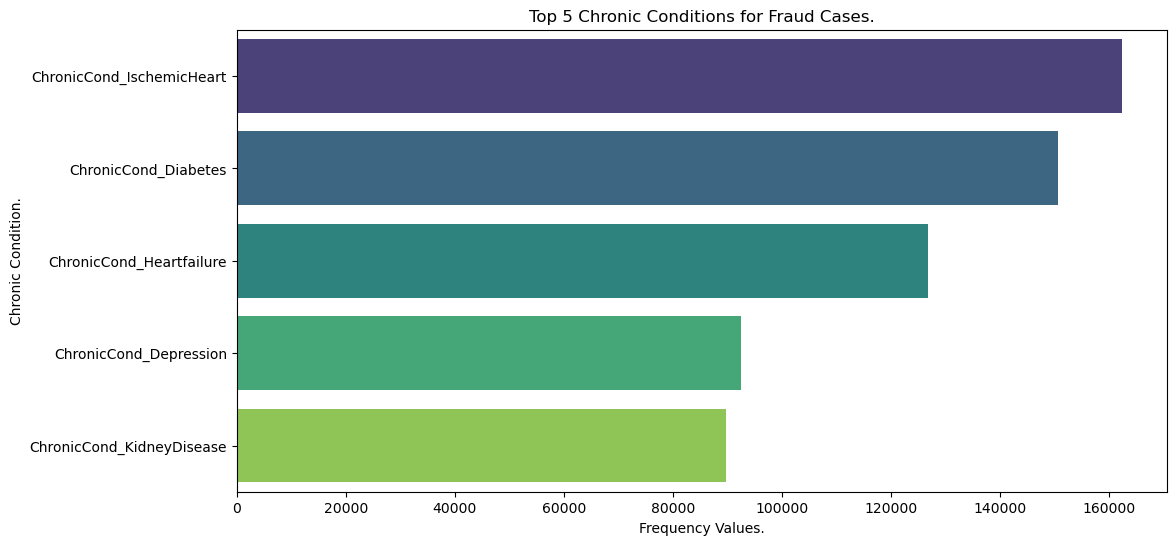

In [68]:
#Defining the list of Chronic Conditions. 
Chronic_Condition_Names = ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

#Adding a new column stating wether it is fraud or not.
BEN_IP_OP_P_df['Status_of_Fraud'] = BEN_IP_OP_P_df['PotentialFraud'].map({'Yes': 'Fraud', 'No': 'Not Fraud'})

#Creating a seperate dataframe for storing the frequency of fraud and non fraud conditions.
Counts_Chronic_Conditions = pd.DataFrame(index=Chronic_Condition_Names, columns=['Fraud', 'Not Fraud'])

#Caluculating the frequency of the based on the conditions.
for Condition_Column in Chronic_Condition_Names:
    fraud_counts = BEN_IP_OP_P_df[BEN_IP_OP_P_df['Status_of_Fraud'] == 'Fraud'][Condition_Column].value_counts()
    
    # Set the counts in the chronic_condition_counts DataFrame
    Counts_Chronic_Conditions.loc[Condition_Column, 'Fraud'] = fraud_counts.get(1, 0)

# Display the top 5 chronic conditions for fraud cases
Top_5_Fraud_Conditions = Counts_Chronic_Conditions.sort_values(by='Fraud', ascending=False).head(5)


# Plotting the top 5 chronic conditions for fraud cases
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_5_Fraud_Conditions['Fraud'], y=Top_5_Fraud_Conditions.index, palette='viridis')
plt.title('Top 5 Chronic Conditions for Fraud Cases.')
plt.xlabel('Frequency Values.')
plt.ylabel('Chronic Condition.')
plt.show()

In [69]:
#Q8.Does the duration of coverage under Part A or Part B have any correlation with the reimbursement amount?

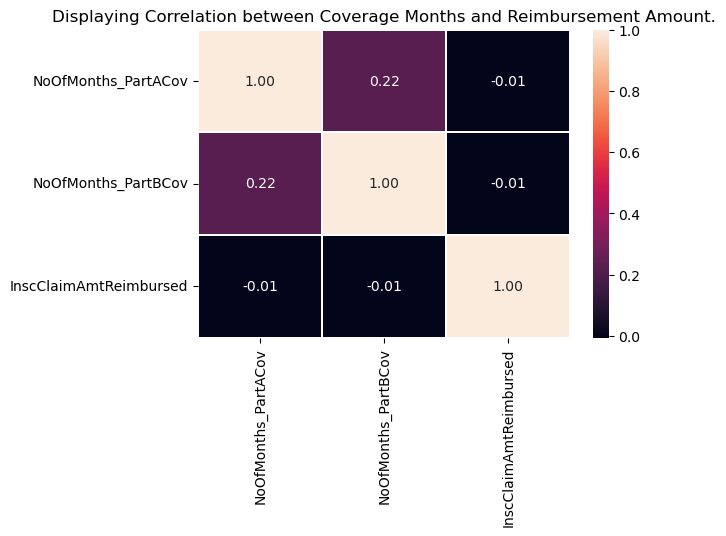

In [70]:
#To find the relation between Coverage of No of Months Part A and No of Parts B we are using Correlation Matrix.
Correlation_Matrix = BEN_IP_OP_P_df[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed']].corr()

#Defining the size of the figure.
plt.figure(figsize=(6,4))

#Creating a Matrix and defining the necccessary parameters.
sns.heatmap(Correlation_Matrix, annot=True, fmt='.2f', linewidths=.1)

#Displaying the Title of Matrix.
plt.title('Displaying Correlation between Coverage Months and Reimbursement Amount.')

#Showing the plot.
plt.show()


In [71]:
#Q9.What is the distribution of claims across different states and counties?

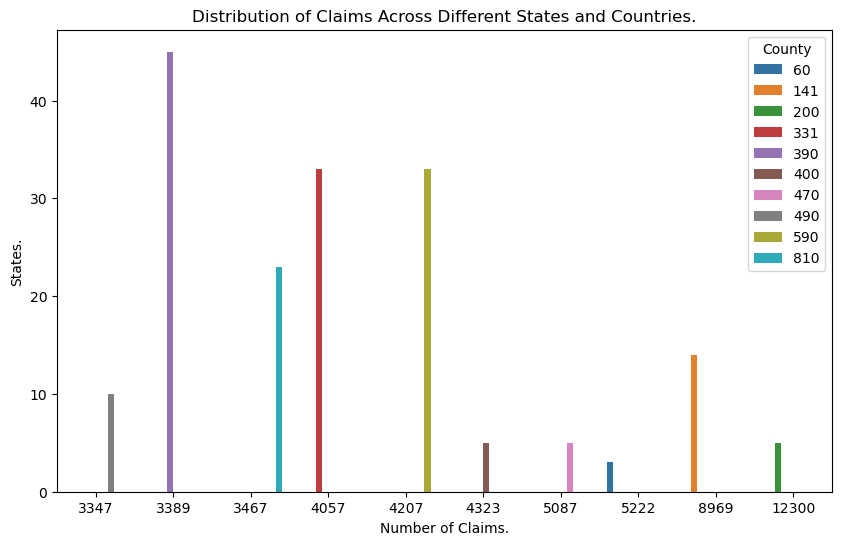

In [72]:
# Counting the number of claims based on State and country Values.
State_County_Counts = BEN_IP_OP_P_df.groupby(['State', 'County']).size().reset_index(name='ClaimCount')

# Sorting the claims in Ascending Order.
State_County_Counts = State_County_Counts.sort_values(by='ClaimCount', ascending=False)

#Defining the size of the plot.
plt.figure(figsize=(10,6))

#Creating a bar plot and defining the necccessary parameters 
sns.barplot(x='ClaimCount', y='State', hue='County', data=State_County_Counts.head(10), dodge=True)

#Displaying the Title of Barplot.
plt.title('Distribution of Claims Across Different States and Countries.')

#Displaying the title of X axis of the bar plot.
plt.xlabel('Number of Claims.')

#Displaying the title of Y axis of the bar plot.
plt.ylabel('States.')

#Showing the plot.
plt.show()